# Exploring a single replay (as an instance of `ReplayData`)

In [3]:
# Imports
from impulse import ReplayDataset
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
project_root = Path('/Users/david/dev/impulse')
data_dir = project_root / 'replays' / 'parsed'
db_path = project_root / 'impulse.db'

replays = ReplayDataset(db_path=str(db_path), data_dir=str(data_dir))

In [ ]:
# Load Game 5 of Team Falcons vs. Team BDS in the RLCS 2024 World Championship Semifinals
# see https://youtu.be/mH4h3Cq6w3Q?t=22553 
sample_replay_id = '583e67ad-7b6f-4163-9cf1-81b0d21accf8'
sample_replay = replays.load_replay(sample_replay_id)

print('Type:',type(sample_replay))
print('Replay ID:', sample_replay.replay_id)
print('Replay name:', sample_replay.replay_name)

Found 192 parsed replays in database
Type: <class 'impulse.replay_dataset.ReplayData'>
Replay ID: 583e67ad-7b6f-4163-9cf1-81b0d21accf8
Replay name: WORLDS P-H FLCN vs BDS G5 2024-09-15.16.18


In [6]:
# for convenience, since we're only working with a single replay
id = sample_replay.replay_id
frames = sample_replay.frames
metadata = sample_replay.metadata

In [7]:
metadata

{'replay_id': '583e67ad-7b6f-4163-9cf1-81b0d21accf8',
 'frame_count': 3479,
 'feature_count': 161,
 'fps': 10.0,
 'parsed_at': '2026-02-04T17:29:15.218771+00:00',
 'source_file': '/Users/david/dev/impulse/replays/raw/rlcs/2024/World Championship/[2] Playoffs/[4] Semifinals/BDS vs FLCN/583e67ad-7b6f-4163-9cf1-81b0d21accf8.replay',
 'ballchasing_id': '83FF88754057B9B0253AF0A3196A1A35',
 'replay_name': 'WORLDS P-H FLCN vs BDS G5 2024-09-15.16.18',
 'date': '2024-09-15 16-18-36',
 'map': 'Underwater_GRS_P',
 'match_type': 'Lan',
 'team_size': 3,
 'num_frames': 10931,
 'duration_seconds': 347.9,
 'team_0_score': 2,
 'team_1_score': 1,
 'goals': [{'PlayerName': 'trk511', 'PlayerTeam': 0, 'frame': 4548},
  {'PlayerName': 'ExoTiiK', 'PlayerTeam': 1, 'frame': 9418},
  {'PlayerName': 'Rw9', 'PlayerTeam': 0, 'frame': 10845}],
 'highlights': [{'BallName': 'Ball_TA_87',
   'CarName': 'Car_TA_517',
   'GoalActorName': 'None',
   'frame': 778},
  {'BallName': 'Ball_TA_87',
   'CarName': 'Car_TA_515',

In [8]:
frames.head()

,frame,current time,frame time,seconds remaining,Ball - position x,Ball - position y,Ball - position z,Ball - linear velocity x,Ball - linear velocity y,Ball - linear velocity z,...,p7_angular velocity z,p7_quaternion x,p7_quaternion y,p7_quaternion z,p7_quaternion w,p7_boost level,p7_dodge active,p7_jump active,p7_double jump active,p7_player demolished by
0,0,14.901003,14.903988,300.0,14.550000,-32.680000,92.779999,1125.540039,-2433.979980,26.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,15.001003,15.005630,300.0,-78.570000,-142.270004,92.059998,-813.640015,-1670.060059,10.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,15.101004,15.107320,300.0,-159.380005,-308.230011,92.099998,-801.159973,-1648.510010,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,15.201004,15.209633,300.0,-238.759995,-471.750000,92.099998,-786.880005,-1624.030029,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,15.301004,15.310703,300.0,-316.700012,-632.840027,92.099998,-772.599976,-1599.660034,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
frames.shape

(3479, 161)

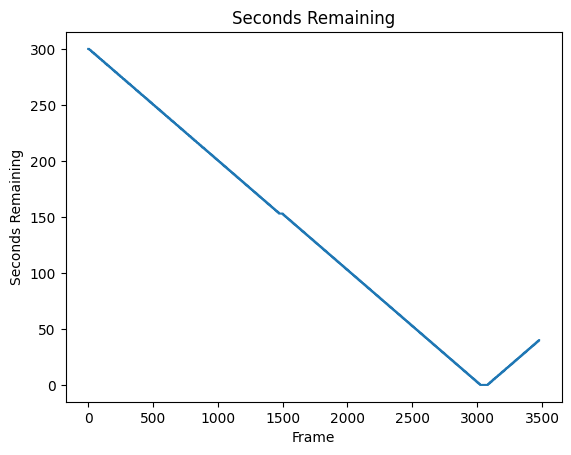

In [10]:
seconds_remaining = frames['seconds remaining']
plt.plot(seconds_remaining)
plt.xlabel('Frame')
plt.ylabel('Seconds Remaining')
plt.title('Seconds Remaining')
plt.show()

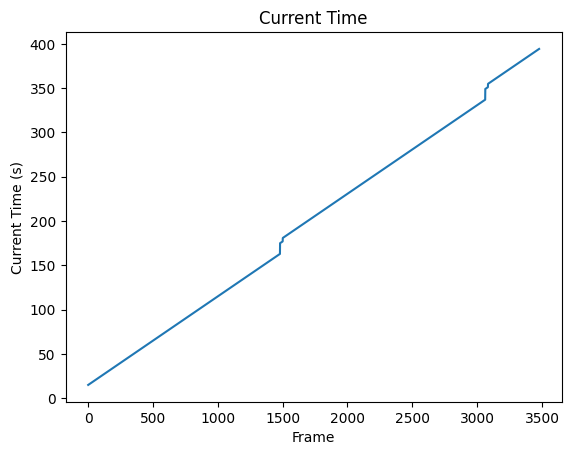

In [11]:
current_time = frames['current time']
plt.plot(current_time)
plt.xlabel('Frame')
plt.ylabel('Current Time (s)')
plt.title('Current Time')
plt.show()

In [12]:
print('Current time min:', current_time.min())
print('Current time max:', current_time.max())

Current time min: 14.901002883911133
Current time max: 394.2158508300781


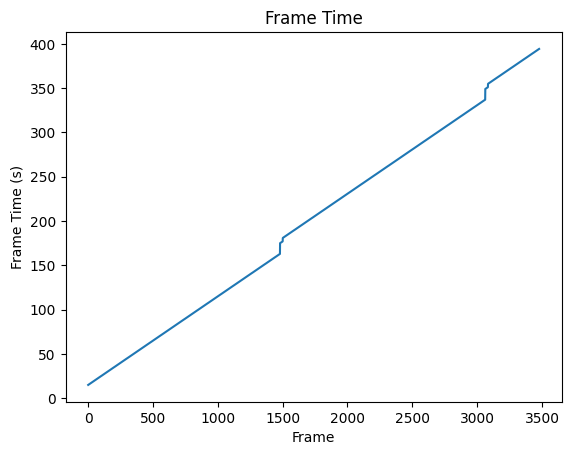

In [13]:
frame_time = frames['frame time']
plt.plot(frame_time)
plt.xlabel('Frame')
plt.ylabel('Frame Time (s)')
plt.title('Frame Time')
plt.show()

In [14]:
print('Frame time min:', frame_time.min())
print('Frame time max:', frame_time.max())

Frame time min: 14.903987884521484
Frame time max: 394.2313537597656


In [15]:
sample_replay.duration_seconds

347.9

It looks like some strange things are happening right around frame 1500 in all three of these plots. Let's look at this region of the data more closely to figure out what's going on.

In [ ]:
first_start_frame = 1400
first_end_frame = 1600

frame_subset = frames.iloc[first_start_frame:first_end_frame][['current time', 'seconds remaining', 'frame time']]
frame_subset

,current time,seconds remaining,frame time
1400,154.901245,161.0,154.928619
1401,155.001251,160.0,155.031281
1402,155.101257,160.0,155.133347
1403,155.201263,160.0,155.234268
1404,155.301270,160.0,155.301651
...,...,...,...
1595,190.203400,143.0,190.216064
1596,190.303406,143.0,190.317627
1597,190.403412,143.0,190.419250
1598,190.503418,143.0,190.520935


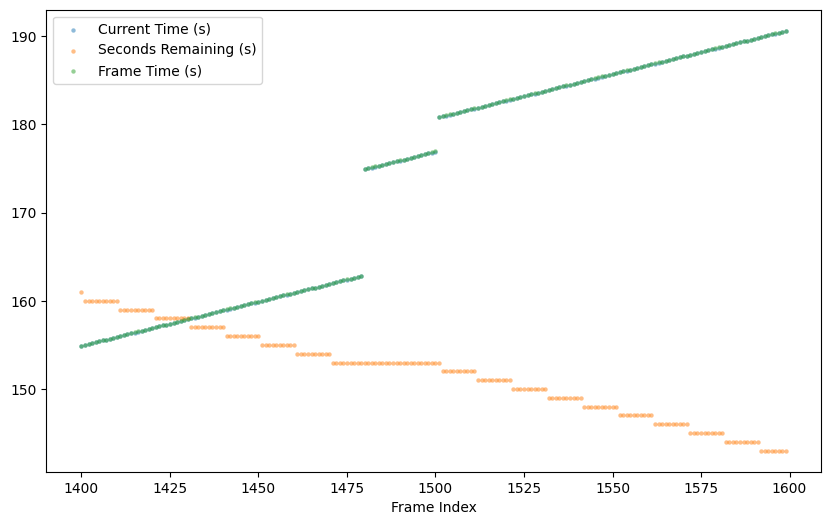

In [ ]:
plt.figure(figsize=(10, 6))

frame_range = range(first_start_frame, first_end_frame)
plt.scatter(frame_range, frame_subset['current time'], label='Current Time (s)', linewidths=0, s= 10, alpha=0.5)
plt.scatter(frame_range, frame_subset['seconds remaining'], label='Seconds Remaining (s)', linewidths=0, s=10, alpha=0.5)
plt.scatter(frame_range, frame_subset['frame time'], label='Frame Time (s)', linewidths=0, s= 10, alpha=0.5)
plt.xlabel('Frame Index')
plt.legend()
plt.show()

Between frames 1479 and 1480 as well as between 1500 and 1501, there is a jump discontinuity in both the `current time` and `frame time` columns. We can also see an anomaly where `seconds remaining` stays at the value `153` for 30 frames (3 seconds) instead of the usual 10 frames (1 second) for other values around it. The extra 20 frames for which `seconds remaining` stays at `153` is precisely the length of the middle branch between the two discontinuities in `current time`/`frame time` at frames 1480 and 1500. 

Let's see if we can resolve this by looking at goal events in the replay. According to the metadata, goal events occur at the following frames:

In [18]:
goal_frames = [goal['frame'] for goal in metadata['goals']]
goal_frames

[4548, 9418, 10845]

And yet, we have fewer frames than that in our `frames` array:

In [19]:
print('Number of frames in raw replay:', str(sample_replay.num_frames))
print('Number of frames in ReplayData.frames array:', str(frames.shape[0]))

Number of frames in raw replay: 10931
Number of frames in ReplayData.frames array: 3479


This discrepancy is explained by the fact that 

In [51]:
raw_frame_rate = sample_replay.num_frames / sample_replay.duration_seconds
#raw_frame_rate = round(raw_frame_rate, 2)
raw_frame_rate

31.41994826099454

This shows that the original replay file was recorded at an effective tick rate of ~31.42 FPS. Note that there are two FPS values we can speak of: 
- the raw replay frame rate, which is the rate at which the original raw replay recorded its game data
- the *sampled* fps, which is the rate at which the parser sampled the frames in the raw replay to put into the `ReplayData.frames` array. 

Thus, for instance:

In [21]:
print('Ratio of raw frames to ReplayData frames:', sample_replay.num_frames / frames.shape[0])

Ratio of raw frames to ReplayData frames: 3.1419948260994537


Thus the ratio of raw replay frames to parsed replay frames differs by the `raw_frame_rate` by a factor of 10, which is the FPS rate of sampling by the parser. 

Let's check how consistent this raw frame rate is across all the replays in our dataset:

In [30]:
raw_frame_rates = []
for replay_id in replays.replay_ids: 
    r = replays.load_replay(replay_id)
    original_fps = round(r.metadata['num_frames'] / r.metadata['duration_seconds'], 2)
    raw_frame_rates.append(original_fps)
raw_frame_rates[:10]


[33.78, 35.02, 33.48, 33.09, 31.16, 33.52, 31.99, 33.76, 31.42, 33.26]

In [31]:
print('Minimum:', min(raw_frame_rates))
print('Maximum:', max(raw_frame_rates))

Minimum: 30.13
Maximum: 35.71


As you can see, the raw frame rate hovers close to 30 FPS but varies somewhat from replay to replay.

This indicates how we should align the goal frame indices in the metadata with the sampled frame indices in our `frames` array. 

In [24]:
ratio = sample_replay.num_frames / frames.shape[0]
adjusted_goal_frames = [int(frame / ratio) for frame in goal_frames]
adjusted_goal_frames

[1447, 2997, 3451]

Let's take a look at the frames around the second anomaly, roughly around frames 2900-3100.

In [34]:
second_start_frame = 2950
second_end_frame = 3100

second_frame_subset = frames.iloc[second_start_frame:second_end_frame][['current time', 'seconds remaining', 'frame time']]
second_frame_subset

,current time,seconds remaining,frame time
2950,325.711670,8.0,325.730164
2951,325.811676,8.0,325.831787
2952,325.911682,7.0,325.933441
2953,326.011688,7.0,326.035095
2954,326.111694,7.0,326.136810
...,...,...,...
3095,355.913513,2.0,355.930237
3096,356.013519,2.0,356.032135
3097,356.113525,2.0,356.133575
3098,356.213531,2.0,356.235260


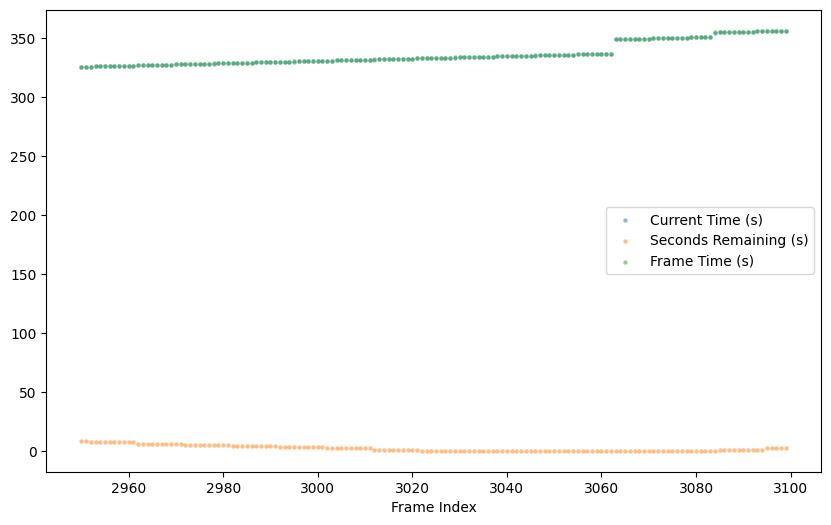

In [35]:
plt.figure(figsize=(10, 6))
second_frame_range = range(second_start_frame, second_end_frame)
plt.scatter(second_frame_range, second_frame_subset['current time'], label='Current Time (s)', linewidths=0, s= 10, alpha=0.5)
plt.scatter(second_frame_range, second_frame_subset['seconds remaining'], label='Seconds Remaining (s)', linewidths=0, s=10, alpha=0.5)
plt.scatter(second_frame_range, second_frame_subset['frame time'], label='Frame Time (s)', linewidths=0, s= 10, alpha=0.5)
plt.xlabel('Frame Index')
plt.legend()
plt.show()

## Figuring out the goal_frame mapping

In [81]:
raw_goal_frames = [goal['frame'] for goal in metadata['goals']]
parsed_goal_frames = [1479, 3062, 3478]     # just a guess, not sure about these
raw_goal_frames

[4548, 9418, 10845]

By inspection using `ReplayViewer`, we can see that goals in the `frames` array occur at frames 1479, 3062, and 3479.

In [68]:
(4548 / ratio) + raw_frame_rate

1478.9080097375293

In [57]:
sample_replay.num_frames

10931

In [69]:
sample_replay.duration_seconds

347.9

In [82]:
for frame in parsed_goal_frames:
    print(f"Frame {frame} current time: {frames.iloc[frame]['current time']}")
    print(f"Frame {frame} seconds remaining: {frames.iloc[frame]['seconds remaining']}")
    print(f"Frame {frame} frame time: {frames.iloc[frame]['frame time']}")
    print('---')

Frame 1479 current time: 162.80172729492188
Frame 1479 seconds remaining: 153.0
Frame 1479 frame time: 162.82666015625
---
Frame 3062 current time: 336.912353515625
Frame 3062 seconds remaining: 0.0
Frame 3062 frame time: 336.9152526855469
---
Frame 3478 current time: 394.2158508300781
Frame 3478 seconds remaining: 40.0
Frame 3478 frame time: 394.2313537597656
---


In [96]:
frames.iloc[3450:][['Ball - position x', 'Ball - position y', 'Ball - position z', 'Ball - linear velocity x', 'Ball - linear velocity y', 'Ball - linear velocity z', 'p0_position x', 'p0_position y', 'p0_position z', 'p0_linear velocity x', 'p0_linear velocity y', 'p0_linear velocity z']]

,Ball - position x,Ball - position y,Ball - position z,Ball - linear velocity x,Ball - linear velocity y,Ball - linear velocity z,p0_position x,p0_position y,p0_position z,p0_linear velocity x,p0_linear velocity y,p0_linear velocity z
3450,1248.739990,2420.270020,436.359985,338.250000,1050.349976,200.199997,2685.530029,-564.570007,17.01,1922.449951,120.779999,0.250000
3451,1282.510010,2525.129883,452.820007,337.170013,1047.109985,134.630005,2876.820068,-545.880005,17.01,1899.890015,264.230011,0.280000
3452,1310.569946,2612.260010,461.540009,336.269989,1044.410034,80.150002,3001.969971,-522.010010,17.01,1854.739990,437.690002,0.280000
3453,1349.719971,2733.870117,466.140015,335.010010,1040.630005,4.100000,3181.620117,-463.489990,17.01,1738.589966,704.119995,0.300000
3454,1383.170044,2837.770020,463.019989,333.929993,1037.390015,-60.770000,3320.419922,-396.140015,17.01,1593.060059,896.950012,0.310000
3455,1334.400024,2897.020020,488.929993,-874.650024,427.109985,353.829987,3516.129883,-228.169998,17.01,974.229980,1305.300049,0.330000
3456,1247.069946,2939.659912,520.739990,-871.890015,425.790009,287.790009,3583.860107,-87.019997,17.01,428.500000,1495.709961,0.090000
3457,1160.030029,2982.169922,545.960022,-869.190002,424.470001,221.960007,3600.010010,41.490002,17.01,13.670000,1567.560059,0.060000
3458,1073.250000,3024.550049,564.590027,-866.549988,423.149994,156.330002,3590.350098,146.539993,17.01,-262.609985,1577.020020,0.060000
3459,986.739990,3066.800049,576.679993,-863.909973,421.829987,90.889999,3554.459961,277.029999,17.01,-550.270020,1558.079956,0.020000
